In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import shap
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import pickle

# print the JS visualization code to the notebook
shap.initjs()

In [2]:
lob = pd.read_csv('Dataset/total_dataset.csv')

In [3]:
lob.head(10)

,Trading_time,Is_it_best_bid_or_ask,The_price_of_the_customer_order,bid_ask_spread,mid_price,micro_price,best_bid,best_ask,time_elapsed,LOB_imbalance,total_quantity_of_all_quotes,p*,Smith's_metric,Trading_price
0,2.8250,0,96,-107,54.5,43.8000,1,108,0.0000,0.50,5,0.0000,0.0000,68
1,3.9625,0,126,-94,61.0,40.8571,14,108,1.1375,0.50,7,0.0000,0.0000,67
2,7.6375,0,85,-7,73.5,72.5455,70,77,3.6750,0.50,11,0.0000,0.0000,72
3,10.3125,1,78,-33,91.5,87.3750,75,108,2.6750,0.50,16,62.4600,31.3166,77
4,12.6750,0,114,-31,91.5,87.8095,76,107,2.3625,0.50,21,65.3567,31.3514,103
5,13.0750,1,139,-31,92.5,91.8261,77,108,0.4000,0.50,23,76.8733,27.2594,107
6,13.9125,0,83,-32,92.0,92.0000,76,108,0.8375,0.50,22,87.3567,23.7909,78
7,14.1875,1,142,-36,90.0,89.2174,72,108,0.2750,0.75,23,85.9100,23.3999,76
8,14.6125,1,119,-37,90.5,89.6190,72,109,0.4250,0.75,21,77.6233,25.0606,108
9,14.9875,0,75,-37,90.5,89.5263,72,109,0.3750,0.50,19,79.8600,23.5660,74


In [4]:
lob_normalized = MinMaxScaler(feature_range = (0,1)).fit_transform(lob)# normalize 
lob_normalized = pd.DataFrame(lob_normalized)
lob_normalized.columns = lob.columns
lob_normalized.head(10)

,Trading_time,Is_it_best_bid_or_ask,The_price_of_the_customer_order,bid_ask_spread,mid_price,micro_price,best_bid,best_ask,time_elapsed,LOB_imbalance,total_quantity_of_all_quotes,p*,Smith's_metric,Trading_price
0,0.002755,0.0,0.364706,0.466702,0.099271,0.050337,0.006803,0.108,0.000000,0.50,0.092593,0.000000,0.000000,0.145833
1,0.004655,0.0,0.717647,0.473519,0.111111,0.046954,0.095238,0.108,0.101111,0.50,0.129630,0.000000,0.000000,0.135417
2,0.010792,0.0,0.235294,0.519140,0.133880,0.083372,0.476190,0.077,0.326667,0.50,0.203704,0.000000,0.000000,0.187500
3,0.015259,1.0,0.152941,0.505506,0.166667,0.100415,0.510204,0.108,0.237778,0.50,0.296296,0.497293,0.070055,0.239583
4,0.019205,0.0,0.576471,0.506555,0.166667,0.100914,0.517007,0.107,0.210000,0.50,0.388889,0.520356,0.070133,0.510417
5,0.019873,1.0,0.870588,0.506555,0.168488,0.105530,0.523810,0.108,0.035556,0.50,0.425926,0.612049,0.060979,0.552083
6,0.021271,0.0,0.211765,0.506030,0.167577,0.105730,0.517007,0.108,0.074444,0.50,0.407407,0.695515,0.053220,0.250000
7,0.021731,1.0,0.905882,0.503933,0.163934,0.102532,0.489796,0.108,0.024444,0.75,0.425926,0.683997,0.052345,0.229167
8,0.022440,1.0,0.635294,0.503408,0.164845,0.102993,0.489796,0.109,0.037778,0.75,0.388889,0.618020,0.056060,0.562500
9,0.023066,0.0,0.117647,0.503408,0.164845,0.102887,0.489796,0.109,0.033333,0.50,0.351852,0.635828,0.052717,0.208333


In [5]:
X = lob_normalized.drop(labels = ['Trading_price'], axis = 1)
y = lob['Trading_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1031)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1031)

# XGBoost

In [6]:
xgb_train = xgb.DMatrix(X_train, label = y_train)
xgb_val = xgb.DMatrix(X_val, label = y_val)
xgb_test = xgb.DMatrix(X_test, label = y_test)

In [7]:
watch_list = [(xgb_train, "train"), (xgb_val, "val")]
num_round = 850

params = {
    "max_depth": 6,
    "eta": 0.01,
    "min_child_weight": 1,
    "objective": 'reg:linear',
    "subsample": 0.75,
    "colsample_bytree": 0.75,
    "reg_alpha": 0.1,
    "reg_lambda": 0.05
}

xgb_model = xgb.train(params, xgb_train, num_round, watch_list)

[22:14:05] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:100.50805	val-rmse:100.45126
[1]	train-rmse:99.50431	val-rmse:99.44833
[2]	train-rmse:98.51058	val-rmse:98.45554
[3]	train-rmse:97.52662	val-rmse:97.47231
[4]	train-rmse:96.55243	val-rmse:96.49921
[5]	train-rmse:95.58810	val-rmse:95.53616
[6]	train-rmse:94.63349	val-rmse:94.58284
[7]	train-rmse:93.68887	val-rmse:93.63926
[8]	train-rmse:92.75326	val-rmse:92.70449
[9]	train-rmse:91.82719	val-rmse:91.77943
[10]	train-rmse:90.91019	val-rmse:90.86356
[11]	train-rmse:90.00236	val-rmse:89.95641
[12]	train-rmse:89.10364	val-rmse:89.05806
[13]	train-rmse:88.21394	val-rmse:88.16920
[14]	train-rmse:87.33373	val-rmse:87.28977
[15]	train-rmse:86.46210	val-rmse:86.41895
[16]	train-rmse:85.59873	val-rmse:85.55668
[17]	train-rmse:84.74409	val-rmse:84.70280
[18]	train-rmse:83.89853	val-rmse:83.85802
[19]	train-rmse:83.06099	val-rmse:83.02140
[20]	train-rmse:82.23216	val-

[186]	train-rmse:15.78137	val-rmse:15.88132
[187]	train-rmse:15.62906	val-rmse:15.73041
[188]	train-rmse:15.47796	val-rmse:15.58063
[189]	train-rmse:15.32830	val-rmse:15.43217
[190]	train-rmse:15.18043	val-rmse:15.28581
[191]	train-rmse:15.03377	val-rmse:15.14039
[192]	train-rmse:14.88907	val-rmse:14.99723
[193]	train-rmse:14.74578	val-rmse:14.85539
[194]	train-rmse:14.60368	val-rmse:14.71476
[195]	train-rmse:14.46357	val-rmse:14.57614
[196]	train-rmse:14.32488	val-rmse:14.43878
[197]	train-rmse:14.18707	val-rmse:14.30193
[198]	train-rmse:14.05109	val-rmse:14.16677
[199]	train-rmse:13.91628	val-rmse:14.03289
[200]	train-rmse:13.78303	val-rmse:13.90084
[201]	train-rmse:13.65124	val-rmse:13.77027
[202]	train-rmse:13.52056	val-rmse:13.64066
[203]	train-rmse:13.39130	val-rmse:13.51258
[204]	train-rmse:13.26371	val-rmse:13.38618
[205]	train-rmse:13.13727	val-rmse:13.26105
[206]	train-rmse:13.01175	val-rmse:13.13665
[207]	train-rmse:12.88753	val-rmse:13.01389
[208]	train-rmse:12.76519	val-rm

[379]	train-rmse:3.48723	val-rmse:3.97219
[380]	train-rmse:3.47215	val-rmse:3.95947
[381]	train-rmse:3.45721	val-rmse:3.94701
[382]	train-rmse:3.44268	val-rmse:3.93491
[383]	train-rmse:3.42835	val-rmse:3.92221
[384]	train-rmse:3.41418	val-rmse:3.90986
[385]	train-rmse:3.40019	val-rmse:3.89798
[386]	train-rmse:3.38673	val-rmse:3.88612
[387]	train-rmse:3.37345	val-rmse:3.87493
[388]	train-rmse:3.35996	val-rmse:3.86365
[389]	train-rmse:3.34703	val-rmse:3.85267
[390]	train-rmse:3.33386	val-rmse:3.84145
[391]	train-rmse:3.32120	val-rmse:3.83087
[392]	train-rmse:3.30889	val-rmse:3.82118
[393]	train-rmse:3.29635	val-rmse:3.81109
[394]	train-rmse:3.28407	val-rmse:3.80125
[395]	train-rmse:3.27218	val-rmse:3.79100
[396]	train-rmse:3.26024	val-rmse:3.78103
[397]	train-rmse:3.24829	val-rmse:3.77169
[398]	train-rmse:3.23676	val-rmse:3.76198
[399]	train-rmse:3.22562	val-rmse:3.75348
[400]	train-rmse:3.21470	val-rmse:3.74418
[401]	train-rmse:3.20373	val-rmse:3.73523
[402]	train-rmse:3.19329	val-rmse:

[575]	train-rmse:2.54256	val-rmse:3.26684
[576]	train-rmse:2.54117	val-rmse:3.26625
[577]	train-rmse:2.54058	val-rmse:3.26578
[578]	train-rmse:2.53931	val-rmse:3.26548
[579]	train-rmse:2.53815	val-rmse:3.26537
[580]	train-rmse:2.53704	val-rmse:3.26472
[581]	train-rmse:2.53578	val-rmse:3.26424
[582]	train-rmse:2.53445	val-rmse:3.26393
[583]	train-rmse:2.53343	val-rmse:3.26350
[584]	train-rmse:2.53250	val-rmse:3.26309
[585]	train-rmse:2.53171	val-rmse:3.26261
[586]	train-rmse:2.53100	val-rmse:3.26236
[587]	train-rmse:2.52984	val-rmse:3.26228
[588]	train-rmse:2.52874	val-rmse:3.26184
[589]	train-rmse:2.52773	val-rmse:3.26144
[590]	train-rmse:2.52676	val-rmse:3.26096
[591]	train-rmse:2.52594	val-rmse:3.26070
[592]	train-rmse:2.52511	val-rmse:3.26055
[593]	train-rmse:2.52461	val-rmse:3.26022
[594]	train-rmse:2.52411	val-rmse:3.25986
[595]	train-rmse:2.52323	val-rmse:3.25939
[596]	train-rmse:2.52228	val-rmse:3.25940
[597]	train-rmse:2.52148	val-rmse:3.25909
[598]	train-rmse:2.52043	val-rmse:

[771]	train-rmse:2.42027	val-rmse:3.24535
[772]	train-rmse:2.41958	val-rmse:3.24534
[773]	train-rmse:2.41933	val-rmse:3.24520
[774]	train-rmse:2.41896	val-rmse:3.24510
[775]	train-rmse:2.41850	val-rmse:3.24515
[776]	train-rmse:2.41804	val-rmse:3.24519
[777]	train-rmse:2.41755	val-rmse:3.24509
[778]	train-rmse:2.41716	val-rmse:3.24510
[779]	train-rmse:2.41651	val-rmse:3.24484
[780]	train-rmse:2.41625	val-rmse:3.24483
[781]	train-rmse:2.41547	val-rmse:3.24466
[782]	train-rmse:2.41487	val-rmse:3.24449
[783]	train-rmse:2.41410	val-rmse:3.24408
[784]	train-rmse:2.41343	val-rmse:3.24404
[785]	train-rmse:2.41264	val-rmse:3.24367
[786]	train-rmse:2.41198	val-rmse:3.24359
[787]	train-rmse:2.41146	val-rmse:3.24361
[788]	train-rmse:2.41116	val-rmse:3.24357
[789]	train-rmse:2.41110	val-rmse:3.24364
[790]	train-rmse:2.41058	val-rmse:3.24373
[791]	train-rmse:2.40998	val-rmse:3.24392
[792]	train-rmse:2.40942	val-rmse:3.24382
[793]	train-rmse:2.40857	val-rmse:3.24382
[794]	train-rmse:2.40799	val-rmse:

In [8]:
val_pred = xgb_model.predict(xgb_val)
xgb_rmse = mean_squared_error(y_val, val_pred, squared = False)
xgb_mae = mean_absolute_error(y_val, val_pred)
xgb_r2score = r2_score(y_val, val_pred)
print(xgb_rmse, xgb_mae, xgb_r2score)

3.2434670041712286 2.041805924647358 0.7962906388739189


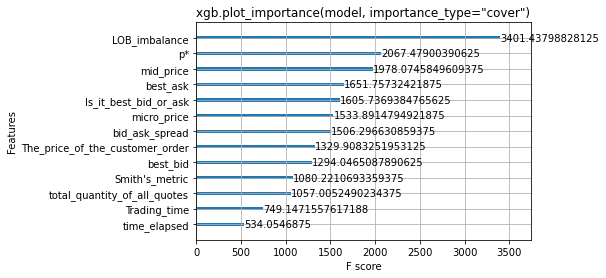

In [9]:
xgb.plot_importance(xgb_model, importance_type="cover")
pl.title('xgb.plot_importance(model, importance_type="cover")')
pl.show()

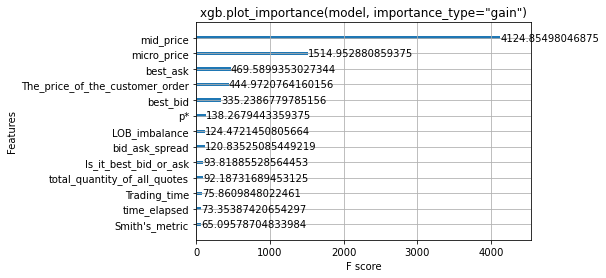

In [10]:
xgb.plot_importance(xgb_model, importance_type="gain")
pl.title('xgb.plot_importance(model, importance_type="gain")')
pl.show()

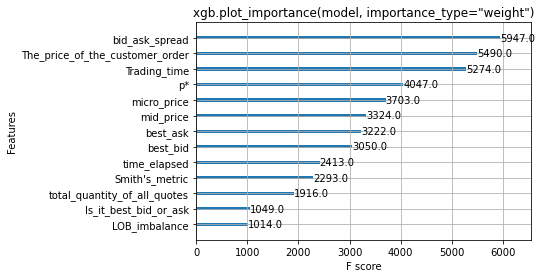

In [11]:
xgb.plot_importance(xgb_model, importance_type="weight")
pl.title('xgb.plot_importance(model, importance_type="weight")')
pl.show()

In [12]:
test_pred = xgb_model.predict(xgb_test)
xgb_rmse_test = mean_squared_error(y_test, test_pred, squared = False)
xgb_mae_test = mean_absolute_error(y_test, test_pred)
xgb_r2score_test = r2_score(y_test, test_pred)
print(xgb_rmse_test, xgb_mae_test, xgb_r2score_test)

3.3625701749473227 2.0297646804691003 0.771694232982441


In [13]:
# Use the Tree SHAP implementation integrated into XGBoost to explain the entire dataset
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

In [14]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [15]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X.iloc[:1000,:])

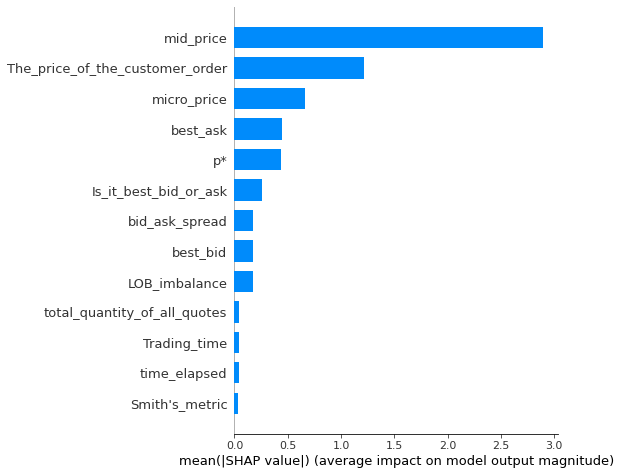

In [16]:
shap.summary_plot(shap_values, X, plot_type="bar")

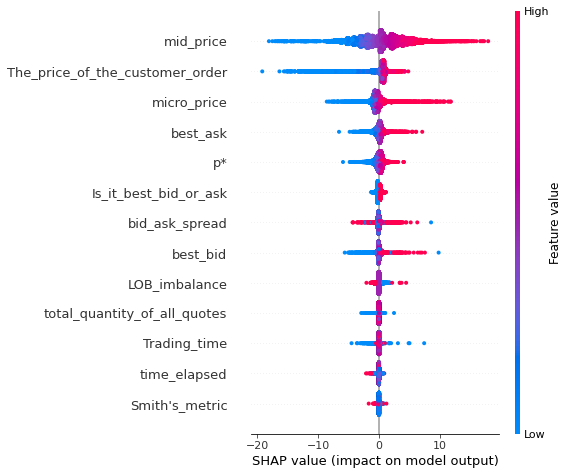

In [17]:
shap.summary_plot(shap_values, X)

In [18]:
X_processed = lob_normalized.drop(labels = ['Trading_price', "Smith's_metric"], axis = 1)
y_processed = lob['Trading_price']

In [19]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_processed, y_processed, test_size = 0.2, random_state = 1031)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_1, y_train_1, test_size = 0.2, random_state = 1031)


In [20]:
xgb_val_1 = xgb.DMatrix(X_val_1, label = y_val_1)
xgb_train_1 = xgb.DMatrix(X_train_1, label = y_train_1)
xgb_test_1 = xgb.DMatrix(X_test_1, label = y_test_1)

In [21]:
watch_list_1 = [(xgb_train_1, "train"), (xgb_val_1, "val")]
num_round_1 = 755

xgb_model_1 = xgb.train(params, xgb_train_1, num_round_1, watch_list_1)

[22:14:51] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:100.50806	val-rmse:100.45191
[1]	train-rmse:99.50427	val-rmse:99.44872
[2]	train-rmse:98.51058	val-rmse:98.45592
[3]	train-rmse:97.52682	val-rmse:97.47317
[4]	train-rmse:96.55283	val-rmse:96.50027
[5]	train-rmse:95.58850	val-rmse:95.53701
[6]	train-rmse:94.63371	val-rmse:94.58304
[7]	train-rmse:93.68906	val-rmse:93.63942
[8]	train-rmse:92.75344	val-rmse:92.70460
[9]	train-rmse:91.82706	val-rmse:91.77880
[10]	train-rmse:90.91005	val-rmse:90.86269
[11]	train-rmse:90.00228	val-rmse:89.95560
[12]	train-rmse:89.10355	val-rmse:89.05779
[13]	train-rmse:88.21394	val-rmse:88.16886
[14]	train-rmse:87.33371	val-rmse:87.28962
[15]	train-rmse:86.46191	val-rmse:86.41863
[16]	train-rmse:85.59824	val-rmse:85.55572
[17]	train-rmse:84.74361	val-rmse:84.70192
[18]	train-rmse:83.89781	val-rmse:83.85699
[19]	train-rmse:83.06027	val-rmse:83.02037
[20]	train-rmse:82.23117	val-

[186]	train-rmse:15.78064	val-rmse:15.87679
[187]	train-rmse:15.62823	val-rmse:15.72524
[188]	train-rmse:15.47715	val-rmse:15.57545
[189]	train-rmse:15.32746	val-rmse:15.42673
[190]	train-rmse:15.17954	val-rmse:15.27985
[191]	train-rmse:15.03324	val-rmse:15.13470
[192]	train-rmse:14.88854	val-rmse:14.99149
[193]	train-rmse:14.74527	val-rmse:14.84976
[194]	train-rmse:14.60309	val-rmse:14.70850
[195]	train-rmse:14.46290	val-rmse:14.56986
[196]	train-rmse:14.32413	val-rmse:14.43291
[197]	train-rmse:14.18638	val-rmse:14.29612
[198]	train-rmse:14.05035	val-rmse:14.16155
[199]	train-rmse:13.91571	val-rmse:14.02835
[200]	train-rmse:13.78247	val-rmse:13.89629
[201]	train-rmse:13.65064	val-rmse:13.76598
[202]	train-rmse:13.51998	val-rmse:13.63640
[203]	train-rmse:13.39080	val-rmse:13.50846
[204]	train-rmse:13.26324	val-rmse:13.38195
[205]	train-rmse:13.13682	val-rmse:13.25682
[206]	train-rmse:13.01135	val-rmse:13.13252
[207]	train-rmse:12.88712	val-rmse:13.00977
[208]	train-rmse:12.76483	val-rm

[379]	train-rmse:3.48587	val-rmse:3.97410
[380]	train-rmse:3.47053	val-rmse:3.96131
[381]	train-rmse:3.45580	val-rmse:3.94840
[382]	train-rmse:3.44119	val-rmse:3.93572
[383]	train-rmse:3.42653	val-rmse:3.92318
[384]	train-rmse:3.41265	val-rmse:3.91121
[385]	train-rmse:3.39886	val-rmse:3.89942
[386]	train-rmse:3.38539	val-rmse:3.88775
[387]	train-rmse:3.37207	val-rmse:3.87637
[388]	train-rmse:3.35833	val-rmse:3.86538
[389]	train-rmse:3.34514	val-rmse:3.85436
[390]	train-rmse:3.33234	val-rmse:3.84323
[391]	train-rmse:3.31964	val-rmse:3.83246
[392]	train-rmse:3.30683	val-rmse:3.82131
[393]	train-rmse:3.29444	val-rmse:3.81121
[394]	train-rmse:3.28221	val-rmse:3.80100
[395]	train-rmse:3.27038	val-rmse:3.79128
[396]	train-rmse:3.25844	val-rmse:3.78134
[397]	train-rmse:3.24693	val-rmse:3.77162
[398]	train-rmse:3.23550	val-rmse:3.76167
[399]	train-rmse:3.22456	val-rmse:3.75258
[400]	train-rmse:3.21373	val-rmse:3.74331
[401]	train-rmse:3.20267	val-rmse:3.73392
[402]	train-rmse:3.19189	val-rmse:

[575]	train-rmse:2.54316	val-rmse:3.26248
[576]	train-rmse:2.54210	val-rmse:3.26208
[577]	train-rmse:2.54120	val-rmse:3.26145
[578]	train-rmse:2.54012	val-rmse:3.26076
[579]	train-rmse:2.53901	val-rmse:3.26050
[580]	train-rmse:2.53834	val-rmse:3.26017
[581]	train-rmse:2.53708	val-rmse:3.25950
[582]	train-rmse:2.53631	val-rmse:3.25916
[583]	train-rmse:2.53540	val-rmse:3.25897
[584]	train-rmse:2.53457	val-rmse:3.25863
[585]	train-rmse:2.53403	val-rmse:3.25830
[586]	train-rmse:2.53336	val-rmse:3.25793
[587]	train-rmse:2.53197	val-rmse:3.25772
[588]	train-rmse:2.53069	val-rmse:3.25754
[589]	train-rmse:2.52963	val-rmse:3.25714
[590]	train-rmse:2.52864	val-rmse:3.25666
[591]	train-rmse:2.52785	val-rmse:3.25638
[592]	train-rmse:2.52712	val-rmse:3.25624
[593]	train-rmse:2.52660	val-rmse:3.25602
[594]	train-rmse:2.52563	val-rmse:3.25581
[595]	train-rmse:2.52477	val-rmse:3.25537
[596]	train-rmse:2.52357	val-rmse:3.25518
[597]	train-rmse:2.52291	val-rmse:3.25450
[598]	train-rmse:2.52188	val-rmse:

In [22]:
val_pred_1 = xgb_model_1.predict(xgb_val_1)
xgb_rmse_1 = mean_squared_error(y_val_1, val_pred_1, squared = False)
xgb_mae_1 = mean_absolute_error(y_val_1, val_pred_1)
xgb_r2score_1 = r2_score(y_val_1, val_pred_1)
print(xgb_rmse_1, xgb_mae_1, xgb_r2score_1)

3.2415256042797704 2.0421936265025957 0.7965344292204897


In [23]:
test_pred_1 = xgb_model_1.predict(xgb_test_1)
xgb_rmse_test_1 = mean_squared_error(y_test_1, test_pred_1, squared = False)
xgb_mae_test_1 = mean_absolute_error(y_test_1, test_pred_1)
xgb_r2score_test_1 = r2_score(y_test_1, test_pred_1)
print(xgb_rmse_test_1, xgb_mae_test_1, xgb_r2score_test_1)

3.357267189529951 2.0316322092564367 0.7724137703680697


In [24]:
# save model
# f = open('xgb.pickle','wb')
# pickle.dump(xgb_model_1,f)
# f.close()

# load model
# f = open('xgb.pickle','rb')
# xgb_load = pickle.load(f)
# f.close()